In [ ]:
%%capture
!pip install scrapegraphai
!apt install chromium-chromedriver
!pip install nest_asyncio
!pip install playwright
!playwright install

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
# correct APIKEY
OPENAI_API_KEY = "YOUR API KEY"

For more examples visit [the examples folder](https://github.com/ScrapeGraphAI/Scrapegraph-ai/tree/main/examples)

# SmartScraperGraph
**SmartScraperGraph** is a class representing one of the default scraping pipelines. It uses a direct graph implementation where each node has its own function, from retrieving html from a website to extracting relevant information based on your query and generate a coherent answer.

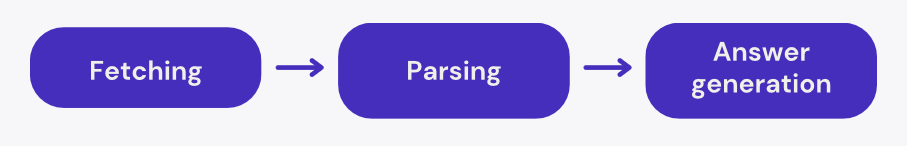

## Using OpenAI models

In [ ]:
from scrapegraphai.graphs import SmartScraperGraph

Define the configuration for the graph

In [ ]:
graph_config = {
    "llm": {
        "api_key": OPENAI_API_KEY,
        "model": "openai/gpt-4o-mini",
        "temperature":0,
    },
    "verbose":True,
}

Create the SmartScraperGraph instance and run it

In [ ]:
smart_scraper_graph = SmartScraperGraph(
    prompt="List me all the projects with their descriptions.",
    # also accepts a string with the already downloaded HTML code
    source="https://perinim.github.io/projects/",
    config=graph_config
)

In [ ]:
graph_config = {
    "llm": {
        "api_key": OPENAI_API_KEY,
        "model": "openai/gpt-4o-mini",
    },
    "verbose": True,
    "headless": True,
}

# ************************************************
# Create the SmartScraperGraph instance and run it
# ************************************************

smart_scraper_graph = SmartScraperGraph(
    prompt="List me all the projects with their description",
    source="https://perinim.github.io/projects/",
    config=graph_config
)

In [ ]:
result = smart_scraper_graph.run()

--- Executing Fetch Node ---
--- (Fetching HTML from: https://perinim.github.io/projects/) ---
--- Executing ParseNode Node ---
--- Executing GenerateAnswer Node ---


In [ ]:
import json

output = json.dumps(result, indent=2)

line_list = output.split("\n")  # Sort of line replacing "\n" with a new line

for line in line_list:
    print(line)

{
  "projects": [
    {
      "name": "Rotary Pendulum RL",
      "description": "Open Source project aimed at controlling a real life rotary pendulum using RL algorithms"
    },
    {
      "name": "DQN Implementation from scratch",
      "description": "Developed a Deep Q-Network algorithm to train a simple and double pendulum"
    },
    {
      "name": "Multi Agents HAED",
      "description": "University project which focuses on simulating a multi-agent system to perform environment mapping. Agents, equipped with sensors, explore and record their surroundings, considering uncertainties in their readings."
    },
    {
      "name": "Wireless ESC for Modular Drones",
      "description": "Modular drone architecture proposal and proof of concept. The project received maximum grade."
    }
  ]
}


# Search graph
This graph **transforms** the user prompt in a **internet search query**, fetch the relevant URLs, and start the scraping process. Similar to the **SmartScraperGraph** but with the addition of the **SearchInternetNode** node.

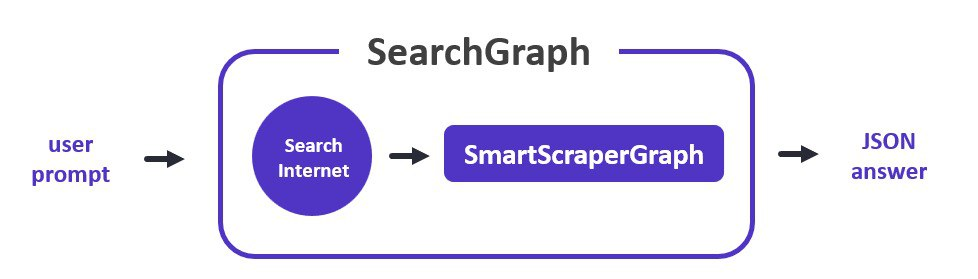

In [ ]:
from scrapegraphai.graphs import SearchGraph

# Define the configuration for the graph
graph_config = {
    "llm": {
        "api_key": OPENAI_API_KEY,
        "model": "openai/gpt-4o-mini",
        "temperature": 0,
    },
}

# Create the SearchGraph instance
search_graph = SearchGraph(
    prompt="List me all the European countries. Look in wikipedia.",
    config=graph_config
)

In [ ]:
result = search_graph.run()

Prettify the result and display the JSON

In [ ]:
import json

output = json.dumps(result, indent=2)

line_list = output.split("\n")  # Sort of line replacing "\n" with a new line

for line in line_list:
    print(line)

{
  "European_countries": [
    "Albania",
    "Andorra",
    "Armenia",
    "Austria",
    "Azerbaijan",
    "Belarus",
    "Belgium",
    "Bosnia and Herzegovina",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Georgia",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Ireland",
    "Italy",
    "Jersey",
    "Isle of Man",
    "Kazakhstan",
    "Latvia",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Moldova",
    "Monaco",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Russia",
    "San Marino",
    "Serbia",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Turkey",
    "Ukraine",
    "United Kingdom",
    "Vatican City",
    "Kosovo",
    "Gibraltar",
    "Faroe Islands",
    "Guernsey",
    "Jersey"
  ],
  "sources": [
    "https://simple.wikipedi

# SpeechGraph
**SpeechGraph** is a class representing one of the default scraping pipelines that generate the answer together with an audio file. Similar to the **SmartScraperGraph** but with the addition of the **TextToSpeechNode** node.


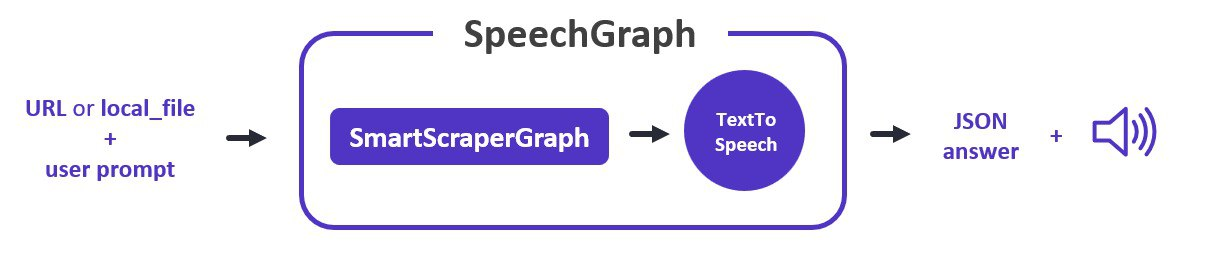

In [ ]:
from scrapegraphai.graphs import SpeechGraph

# Define the configuration for the graph
graph_config = {
    "llm": {
        "api_key": OPENAI_API_KEY,
        "model": "gpt-3.5-turbo",
    },
    "tts_model": {
        "api_key": OPENAI_API_KEY,
        "model": "tts-1",
        "voice": "alloy"
    },
    "output_path": "website_summary.mp3",
}

# Create the SpeechGraph instance
speech_graph = SpeechGraph(
    prompt="Create a summary of the website",
    source="https://perinim.github.io/projects/",
    config=graph_config,
)

In [ ]:
result = speech_graph.run()
answer = result.get("answer", "No answer found")

--- Executing Fetch Node ---


Fetching pages: 100%|##########| 1/1 [00:00<00:00, 17.07it/s]


--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---


Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 339.78it/s]


--- Executing TextToSpeech Node ---
Audio saved to website_summary.mp3


Prettify the result and display the JSON

In [ ]:
import json

output = json.dumps(answer, indent=2)

line_list = output.split("\n")  # Sort of line replacing "\n" with a new line

for line in line_list:
    print(line)

{
  "summary": {
    "title": "Projects | Marco Perini",
    "projects": [
      {
        "title": "Rotary Pendulum RL",
        "description": "Open Source project aimed at controlling a real life rotary pendulum using RL algorithms"
      },
      {
        "title": "DQN Implementation from scratch",
        "description": "Developed a Deep Q-Network algorithm to train a simple and double pendulum"
      },
      {
        "title": "Multi Agents HAED",
        "description": "University project which focuses on simulating a multi-agent system to perform environment mapping. Agents, equipped with sensors, explore and record their surroundings, considering uncertainties in their readings."
      },
      {
        "title": "Wireless ESC for Modular Drones",
        "description": "Modular drone architecture proposal and proof of concept. The project received maximum grade."
      }
    ]
  }
}


In [ ]:
from IPython.display import Audio
wn = Audio("website_summary.mp3", autoplay=True)
display(wn)

# Build a Custom Graph
It is possible to **build your own scraping pipeline** by using the default nodes and place them as you wish, without using pre-defined graphs.

You can create **custom graphs** based on your necessities, using standard nodes provided by the library.

The list of the existing nodes can be found through the *nodes_metadata* json construct.



In [ ]:
# check available nodes
from scrapegraphai.helpers import nodes_metadata

nodes_metadata.keys()

dict_keys(['SearchInternetNode', 'FetchNode', 'GetProbableTagsNode', 'ParseNode', 'RAGNode', 'GenerateAnswerNode', 'ConditionalNode', 'ImageToTextNode', 'TextToSpeechNode'])

In [ ]:
# to get more information about a node
nodes_metadata['ImageToTextNode']

{'description': 'Converts image content to text by \n        extracting visual information and interpreting it.',
 'type': 'node',
 'args': {'image_data': 'Data of the image to be processed.'},
 'returns': "Updated state with the textual description of the image under 'image_text' key."}

To create a custom graph we must:

1.   **Istantiate the nodes** you want to use
2.   Create the graph using **BaseGraph** class, which must have a **list of nodes**, tuples representing the **edges** of the graph, an **entry_point**
3.   Run it using the **execute** method



In [ ]:
from langchain_openai import OpenAIEmbeddings
from scrapegraphai.models import OpenAI
from scrapegraphai.graphs import BaseGraph
from scrapegraphai.nodes import FetchNode, ParseNode, RAGNode, GenerateAnswerNode

# Define the configuration for the graph
graph_config = {
    "llm": {
        "api_key": OPENAI_API_KEY,
        "model": "openai/gpt-4o",
        "temperature": 0,
        "streaming": True
    },
}

llm_model = OpenAI(graph_config["llm"])
embedder = OpenAIEmbeddings(api_key=llm_model.openai_api_key)

# define the nodes for the graph
fetch_node = FetchNode(
    input="url | local_dir",
    output=["doc", "link_urls", "img_urls"],
    node_config={
        "verbose": True,
        "headless": True,
    }
)
parse_node = ParseNode(
    input="doc",
    output=["parsed_doc"],
    node_config={
        "chunk_size": 4096,
        "verbose": True,
    }
)
rag_node = RAGNode(
    input="user_prompt & (parsed_doc | doc)",
    output=["relevant_chunks"],
    node_config={
        "llm_model": llm_model,
        "embedder_model": embedder,
        "verbose": True,
    }
)
generate_answer_node = GenerateAnswerNode(
    input="user_prompt & (relevant_chunks | parsed_doc | doc)",
    output=["answer"],
    node_config={
        "llm_model": llm_model,
        "verbose": True,
    }
)

# create the graph by defining the nodes and their connections
graph = BaseGraph(
    nodes=[
        fetch_node,
        parse_node,
        rag_node,
        generate_answer_node,
    ],
    edges=[
        (fetch_node, parse_node),
        (parse_node, rag_node),
        (rag_node, generate_answer_node)
    ],
    entry_point=fetch_node
)


In [ ]:
# execute the graph
result, execution_info = graph.execute({
    "user_prompt": "List me the projects with their description",
    "url": "https://perinim.github.io/projects/"
})

# get the answer from the result
result = result.get("answer", "No answer found.")

--- Executing Fetch Node ---


Fetching pages: 100%|##########| 1/1 [00:00<00:00, 28.65it/s]


--- Executing Parse Node ---
--- Executing RAG Node ---
--- (updated chunks metadata) ---
--- (tokens compressed and vector stored) ---
--- Executing GenerateAnswer Node ---


Processing chunks: 100%|██████████| 1/1 [00:00<00:00, 911.01it/s]


Prettify the result and display the JSON

In [ ]:
import json

output = json.dumps(result, indent=2)

line_list = output.split("\n")  # Sort of line replacing "\n" with a new line

for line in line_list:
    print(line)

{
  "projects": [
    {
      "title": "Rotary Pendulum RL",
      "description": "Open Source project aimed at controlling a real life rotary pendulum using RL algorithms"
    },
    {
      "title": "DQN Implementation from scratch",
      "description": "Developed a Deep Q-Network algorithm to train a simple and double pendulum"
    },
    {
      "title": "Multi Agents HAED",
      "description": "University project which focuses on simulating a multi-agent system to perform environment mapping. Agents, equipped with sensors, explore and record their surroundings, considering uncertainties in their readings."
    },
    {
      "title": "Wireless ESC for Modular Drones",
      "description": "Modular drone architecture proposal and proof of concept. The project received maximum grade."
    }
  ]
}
